# Выбор локации для скважины

Необходимо решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# Увеличение разрешения визуализаций
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_48/4102136135.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
# Сразу подготовим инструменты для дальнейшего использования
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [3]:
# Загрузим датафрейм и взглянем на него
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# Загрузим датафрейм и взглянем на него
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
# Загрузим датафрейм и взглянем на него
df2 = pd.read_csv('/datasets/geo_data_2.csv')
df2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
df0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

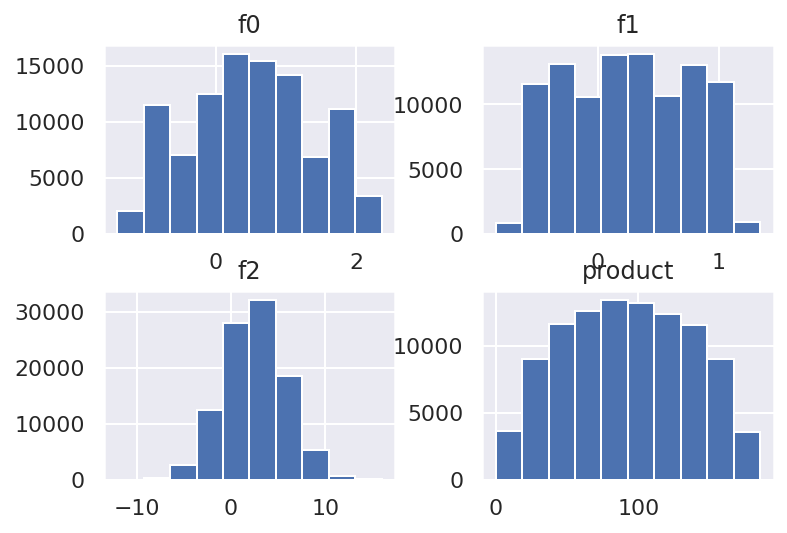

In [9]:
df0.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

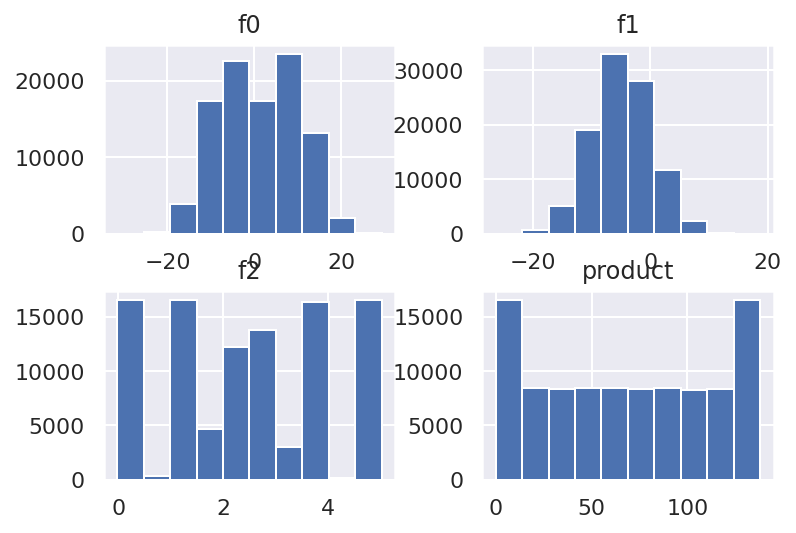

In [10]:
df1.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

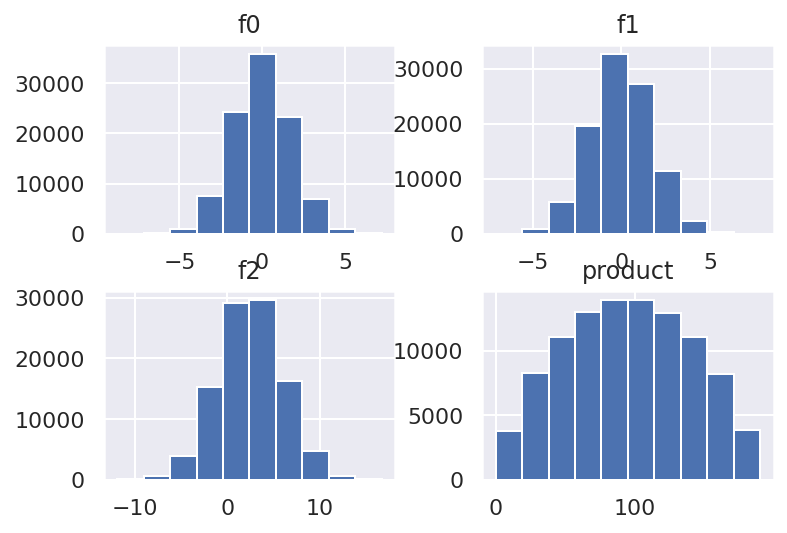

In [11]:
df2.hist()

Данные загружены, пропусков нет, распределение целевого признака сильно отличается в регионах 0 и 2 и регионе 1.

## Обучение и проверка модели

In [12]:
X = ['f0', 'f1', 'f2']
y = 'product'

In [13]:
from sklearn.model_selection import train_test_split
train_0, val_0 = train_test_split(df0, train_size=0.75, random_state=42)
train_1, val_1 = train_test_split(df1, train_size=0.75, random_state=42)
train_2, val_2 = train_test_split(df2, train_size=0.75, random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipe_model = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])

In [15]:
pipe_model.fit(train_0[X], train_0[y])
pred_0 = pipe_model.predict(val_0[X])

pipe_model.fit(train_1[X], train_1[y])
pred_1 = pipe_model.predict(val_1[X])

pipe_model.fit(train_2[X], train_2[y])
pred_2 = pipe_model.predict(val_2[X])

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'''Регион 0:
Cредний запас предсказанного сырья: {pred_0.mean()}
RMSE модели: {mean_squared_error(pred_0, val_0[y], squared=False)}
MAE модели: {mean_absolute_error(pred_0, val_0[y])}
''')
print(f'''Регион 1:
Cредний запас предсказанного сырья: {pred_1.mean()}
RMSE модели: {mean_squared_error(pred_1, val_1[y], squared=False)}
MAE модели: {mean_absolute_error(pred_1, val_1[y])}
''')
print(f'''Регион 2:
Cредний запас предсказанного сырья: {pred_2.mean()}
RMSE модели: {mean_squared_error(pred_2, val_2[y], squared=False)}
MAE модели: {mean_absolute_error(pred_2, val_2[y])}
''')

Регион 0:
Cредний запас предсказанного сырья: 92.39879990657768
RMSE модели: 37.75660035026169
MAE модели: 31.047681538788183

Регион 1:
Cредний запас предсказанного сырья: 68.7128780391376
RMSE модели: 0.8902801001028846
MAE модели: 0.7170119535682558

Регион 2:
Cредний запас предсказанного сырья: 94.77102387765939
RMSE модели: 40.145872311342174
MAE модели: 32.896958610578054



## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [17]:
budget = 10_000_000_000
num_of_points = 200
cost = 450_000
threshold = 0.025
f'Достаточный объём сырья для безубыточной разработки новой скважины \
(Если все объемы равны): {round(budget / num_of_points / cost)} тысяч баррелей'

'Достаточный объём сырья для безубыточной разработки новой скважины (Если все объемы равны): 111 тысяч баррелей'

## Расчёт прибыли и рисков 

In [24]:
from scipy.stats import norm
from tqdm.auto import tqdm

# Обьявляем функцию для бутстрэпирования
def get_bootstrap(
    data_column_1,# предикт
    data_column_2, # таргет
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    np.random.seed(42)
    state = np.random.RandomState(42)
    data_column_1 = pd.Series(data_column_1).reset_index(drop=True)
    data_column_1 = data_column_1.to_frame()
    data_column_2 = pd.Series(data_column_2).reset_index(drop=True)
    data = data_column_1.join(data_column_2)
    data.columns = ['pred', 'y_true']
    boot_len = 500
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data.sample(
            boot_len,
            axis=0,
            replace = True, # параметр возвращения
            random_state=state
        )
            
        boot_data.append(statistic(samples_1)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    loss_frac = float((pd_boot_data < 0).sum() / boot_it)
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=boot_it / 20,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"quants": quants,
            "mean": f'{np.mean(boot_data):_.0f} ₽',
            "risk_proba": f'{p_1 * 100 :.2f}%',
            "loss_frac": f'{loss_frac * 100 :.2f}%'
           }

In [25]:
def sample_profit(data):
    best = data.sort_values(by='pred', ascending=False).head(200)['y_true'].values
    return round(sum(best) * cost) - budget

  0%|          | 0/1000 [00:00<?, ?it/s]

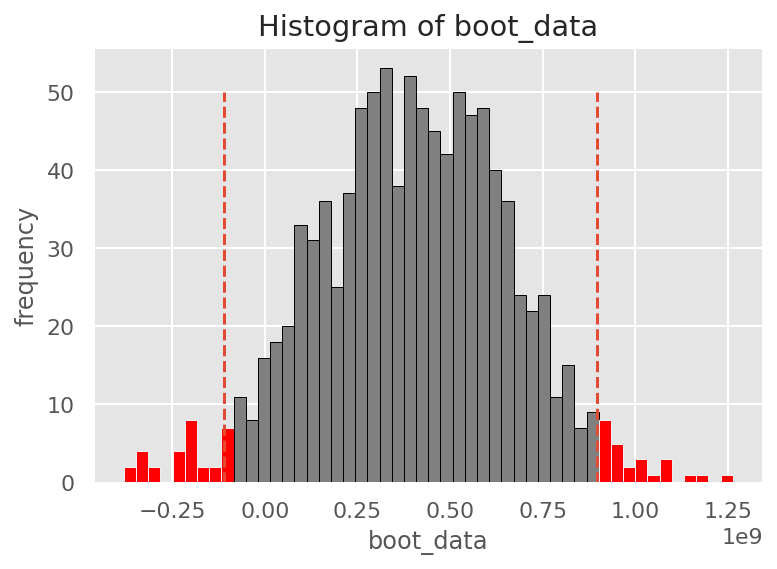

{'quants':                   0
 0.025 -1.104679e+08
 0.975  8.974603e+08,
 'mean': '399_575_478 ₽',
 'risk_proba': '6.18%',
 'loss_frac': '6.00%'}

In [26]:
get_bootstrap(pred_0, val_0[y], statistic=sample_profit)

  0%|          | 0/1000 [00:00<?, ?it/s]

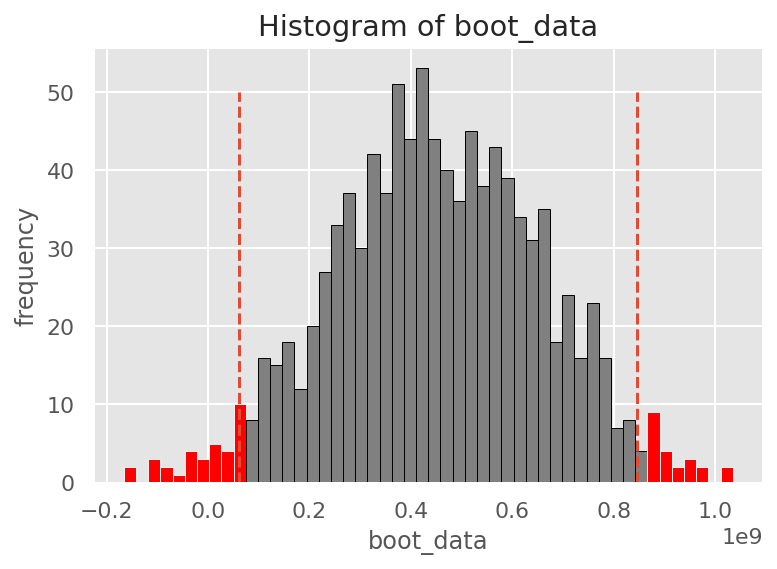

{'quants':                   0
 0.025  6.168448e+07
 0.975  8.453402e+08,
 'mean': '452_048_891 ₽',
 'risk_proba': '1.36%',
 'loss_frac': '1.50%'}

In [27]:
get_bootstrap(pred_1, val_1[y], statistic=sample_profit)

  0%|          | 0/1000 [00:00<?, ?it/s]

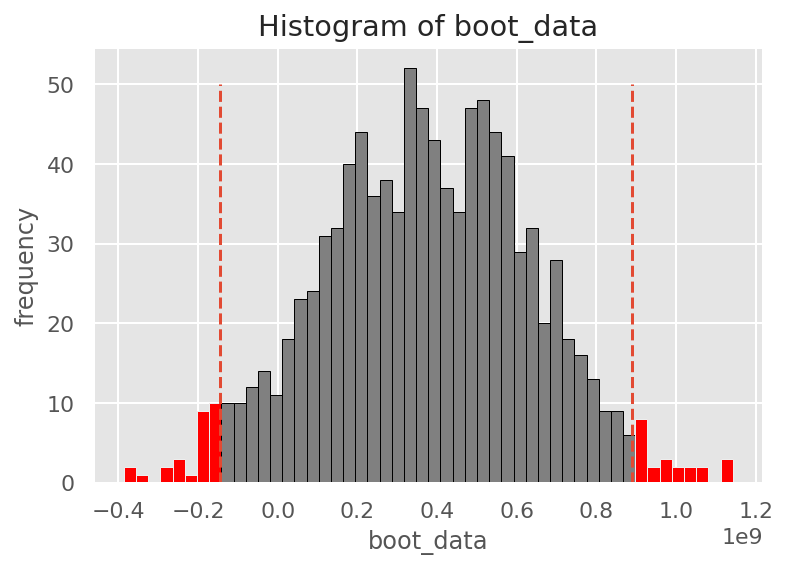

{'quants':                   0
 0.025 -1.447667e+08
 0.975  8.883904e+08,
 'mean': '375_009_903 ₽',
 'risk_proba': '7.63%',
 'loss_frac': '8.00%'}

In [28]:
get_bootstrap(pred_2, val_2[y], statistic=sample_profit)

Итак, только регион 1 проходит порог максимальной вероятности убытка (2.5%). 
- Средняя ожидаемая прибыль - 452_048_891 ₽
- 95%-ый доверительный интервал прибыли - 61_684_479 - 845_340_177 ₽
- Вероятность убытка - 1.5%